# Todos
- Feature selection
    - isolation forest
    - autoencoder

# Questions
- The dataset has anonymized features that represent various transaction attributes (e.g. time, location, etc.). If a feature seems to be very relevant or irrelevant, we cannot really explain this behaviour because we do not know what this feature represents. How to handle this?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import pickle as pkl

# Data loading
df_head = pd.read_csv('../data/creditcard_2023_head.csv')

# Loading first setup
with open('../data/setup_1.pkl', 'rb') as f:
    setup1 = pkl.load(f)

X_train, _, X_test, y_test = setup1['X_train'], setup1['y_train'], setup1['X_test'], setup1['y_test']

## Idea: 

We have X_train. On this dataset, we train some anomaly detection algorithm. We do not have y_train, which would be the labels for X_train. So we train a **unsupervised anomaly detection** algorithm!

Then, after having trained on X_train, we can use our algorithm on X_test and the corresponding labels y_test to check whether our unsupervised algorithm is actually any good

## Data samples: 255883
## Columns: 30

In [3]:
X_train.shape

(255883, 30)

In [4]:
X_test.shape

(56864, 30)

In [5]:
y_test.shape

(56864,)

# Convert X_train to DataFrame

--> one feature (ID) is excluded, which is fine because it does not carry any valuable information

In [6]:
# Assuming the first column is 'id' and the last column is 'amount'
columns = ['Feature_' + str(i) for i in range(1, X_train.shape[1]-1)] + ['Amount']
X_train_df = pd.DataFrame(X_train[:, 1:], columns=columns)  # Excluding 'id'

# Analyze data

In [7]:
X_train_df.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
       'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20',
       'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
       'Feature_26', 'Feature_27', 'Feature_28', 'Amount'],
      dtype='object')

In [8]:
len(X_train_df.columns)

29

In [9]:
X_train_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount
0,-0.808528,0.674859,-0.449053,-1.009887,-0.313425,-0.329320,-0.032745,0.596103,0.689862,1.072580,...,-0.051966,0.068797,1.023462,0.377241,-0.611014,-0.430071,-0.385856,0.211656,0.686939,5627.33
1,0.074483,-0.412612,1.567228,-1.086749,-0.002263,-0.020128,0.395198,-0.184193,-0.136276,0.834880,...,0.023013,-0.005700,0.531355,0.016798,0.860576,-0.986578,-0.710048,-0.184877,0.322587,15063.76
2,0.756835,-0.449989,0.898726,0.290844,0.369626,1.465313,0.286892,0.003828,0.492053,0.755715,...,-0.501453,-0.093142,0.212591,0.030729,-1.594817,0.276861,0.412457,-0.159757,-0.075716,19639.65
3,1.171350,-1.101996,-0.226173,-1.968957,0.360373,0.620495,0.532979,-0.149801,1.760402,0.162676,...,0.187468,0.112663,1.158432,-0.370593,-2.443644,0.176785,-1.318719,-0.229471,-0.175032,1983.72
4,-0.076201,0.056564,0.014876,-0.250377,0.840080,0.452710,0.905192,-0.071975,-0.033624,0.376080,...,-0.181484,-0.068607,0.319503,-0.168810,0.221816,0.095515,-0.973325,0.032127,0.323907,13082.62


### data has only float features

In [10]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255883 entries, 0 to 255882
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Feature_1   255883 non-null  float64
 1   Feature_2   255883 non-null  float64
 2   Feature_3   255883 non-null  float64
 3   Feature_4   255883 non-null  float64
 4   Feature_5   255883 non-null  float64
 5   Feature_6   255883 non-null  float64
 6   Feature_7   255883 non-null  float64
 7   Feature_8   255883 non-null  float64
 8   Feature_9   255883 non-null  float64
 9   Feature_10  255883 non-null  float64
 10  Feature_11  255883 non-null  float64
 11  Feature_12  255883 non-null  float64
 12  Feature_13  255883 non-null  float64
 13  Feature_14  255883 non-null  float64
 14  Feature_15  255883 non-null  float64
 15  Feature_16  255883 non-null  float64
 16  Feature_17  255883 non-null  float64
 17  Feature_18  255883 non-null  float64
 18  Feature_19  255883 non-null  float64
 19  Fe

### Data has only unique rows

In [11]:
X_train_df.nunique()

Feature_1     248152
Feature_2     248152
Feature_3     248152
Feature_4     248152
Feature_5     248152
Feature_6     248152
Feature_7     248152
Feature_8     248152
Feature_9     248152
Feature_10    248152
Feature_11    248152
Feature_12    248152
Feature_13    248152
Feature_14    248152
Feature_15    248152
Feature_16    248152
Feature_17    248152
Feature_18    248152
Feature_19    248152
Feature_20    248152
Feature_21    248152
Feature_22    248152
Feature_23    248152
Feature_24    248152
Feature_25    248152
Feature_26    248152
Feature_27    248152
Feature_28    248152
Amount        242767
dtype: int64

### data has no missing values

In [12]:
X_train_df.isnull().sum()

Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Amount        0
dtype: int64

### data has no infinite values

In [13]:
np.isinf(X_train_df.values).any()

False

# Basic Statistics

In [14]:
X_train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Feature_1,255883.0,0.506192,0.824038,-3.495584,-0.137438,0.212639,1.090042,2.229046
Feature_2,255883.0,-0.492319,0.700974,-49.966572,-0.660344,-0.423236,-0.189034,3.647003
Feature_3,255883.0,0.681908,0.703057,-3.183760,0.149117,0.566410,1.105220,14.125834
Feature_4,255883.0,-0.736012,0.671135,-4.951222,-1.081943,-0.637103,-0.314998,3.201536
Feature_5,255883.0,0.338537,0.663794,-9.952786,0.013743,0.232671,0.518516,42.716891
Feature_6,255883.0,0.435312,0.726111,-21.111108,0.016245,0.316935,0.699243,26.168402
Feature_7,255883.0,0.491623,0.696338,-3.038728,0.261604,0.447361,0.650022,217.873038
Feature_8,255883.0,-0.144017,0.232769,-7.869677,-0.198923,-0.147507,-0.077116,5.517577
Feature_9,255883.0,0.585029,0.736515,-1.861699,0.144241,0.465303,0.889485,20.270062
Feature_10,255883.0,0.673914,0.641420,-1.767891,0.394250,0.560180,0.811756,31.722709


# Histograms

Many features can be described by a Gaussian function. Some functions only have 1-2 different values. And feature 1 has maybe a Gaussian mixture

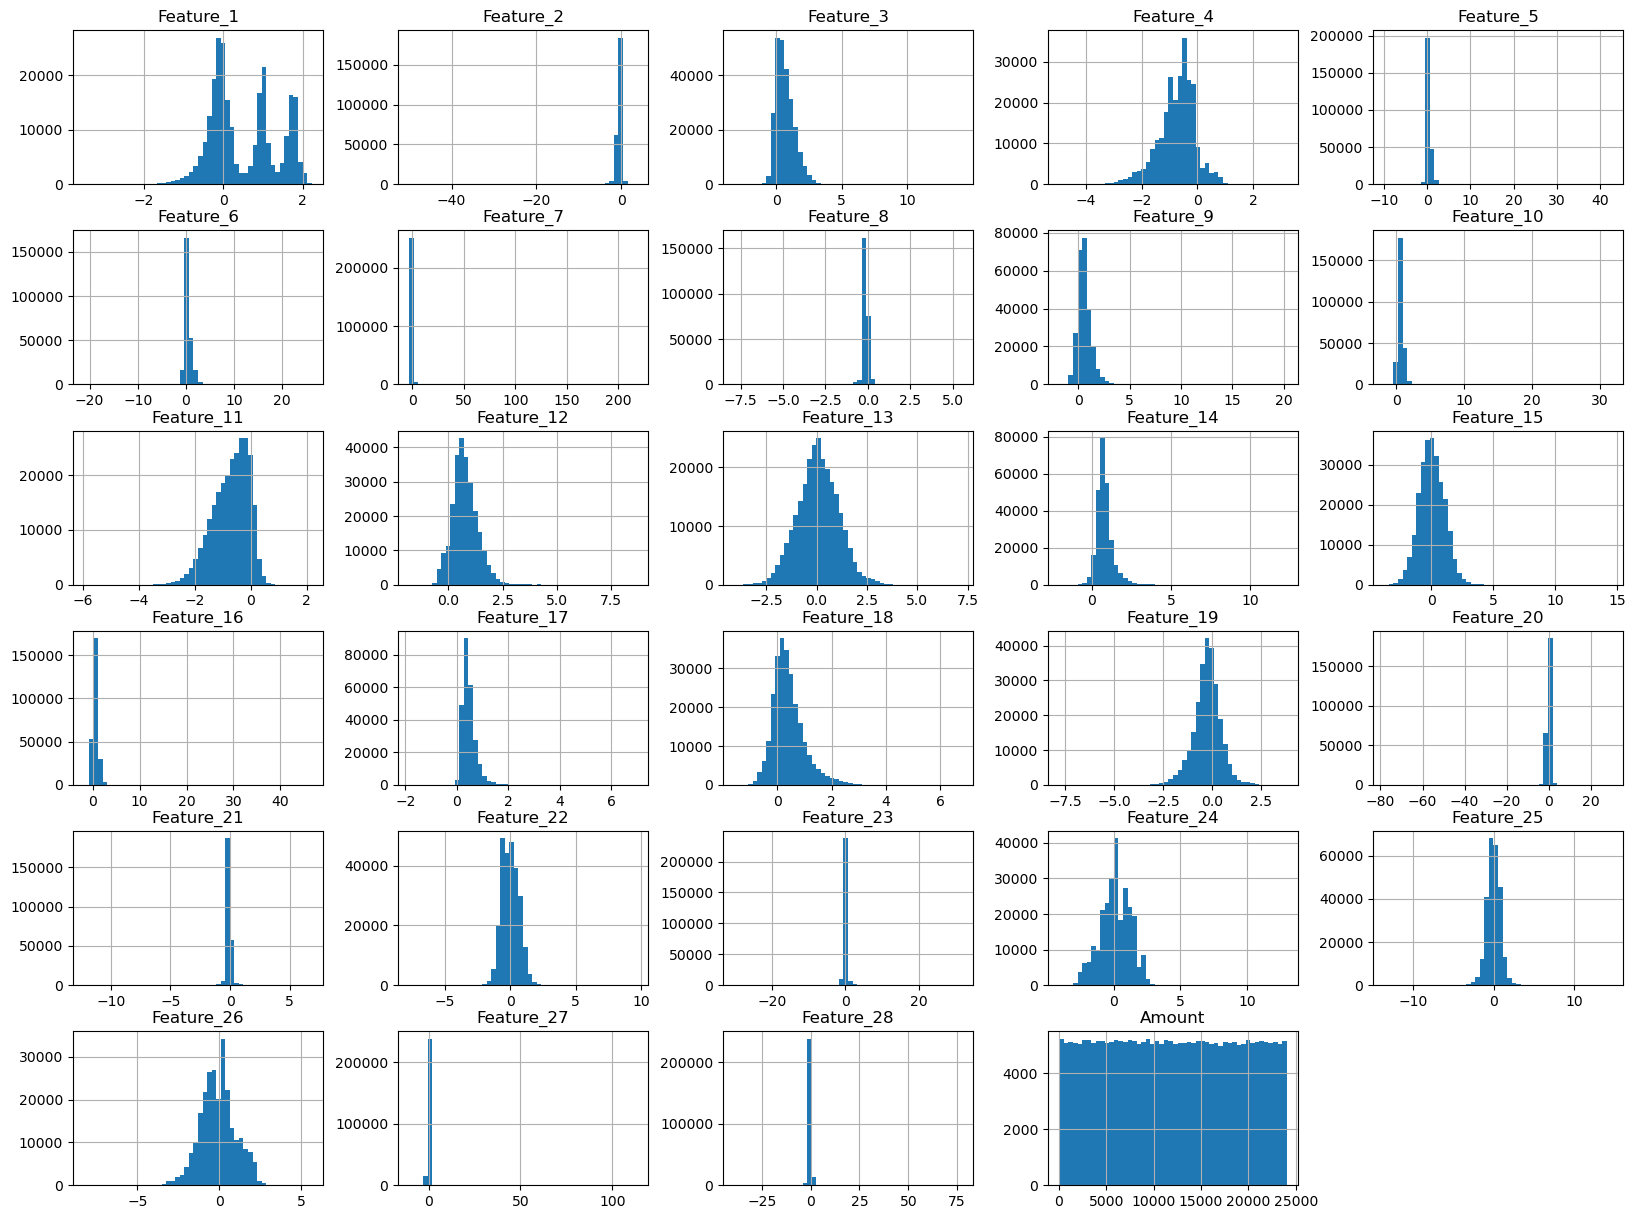

In [15]:
# Histograms for feature distributions (excluding 'id')
X_train_df.hist(bins=50, figsize=(20,15))
plt.show()

# Box plots

We can already see: Some features clearly have outlier values, the question is whether they also indicate an anomaly directly. Probably yes.

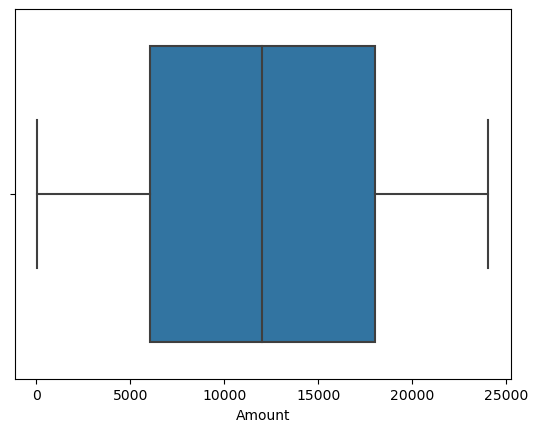

In [16]:
# Box plots for the transaction amount
sns.boxplot(x=X_train_df['Amount'])
plt.show()

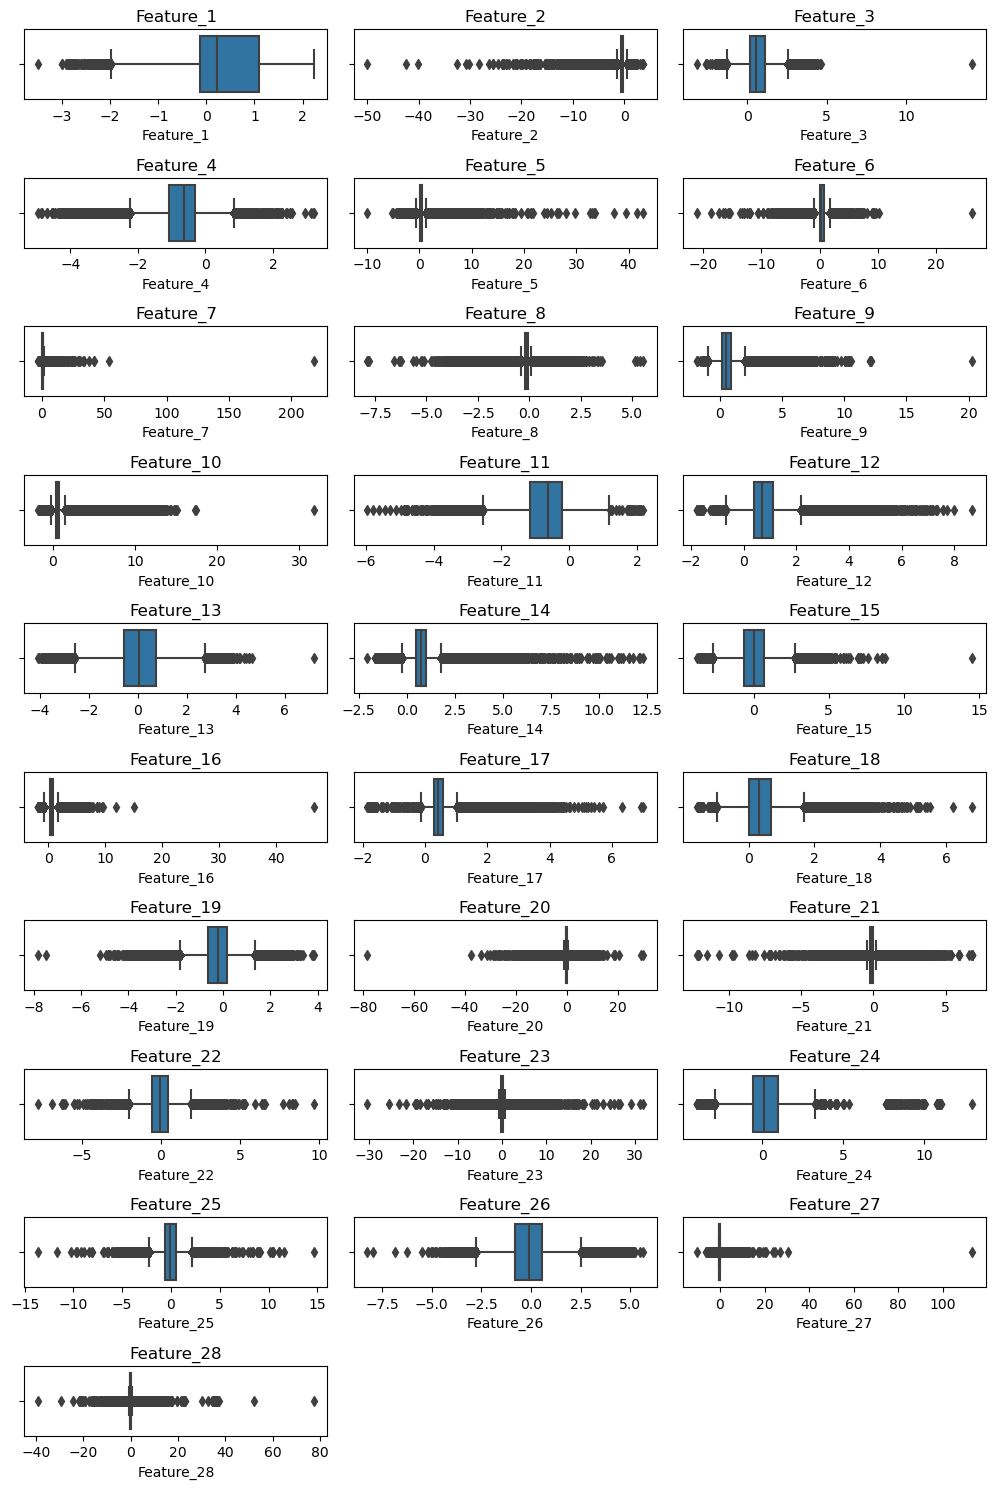

In [17]:
n_features = len(X_train_df.drop('Amount', axis=1).columns)
n_rows = 10
n_cols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15))  # Adjust the size as needed

# Flatten the axes array for easy iterating
axes = axes.flatten()

for i, col in enumerate(X_train_df.drop('Amount', axis=1).columns):
    sns.boxplot(x=X_train_df[col], ax=axes[i])
    axes[i].set_title(col)  # Set title for each subplot

# If the number of features is not a multiple of the grid size, hide the empty plots
for i in range(n_features, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

# Violin Plots

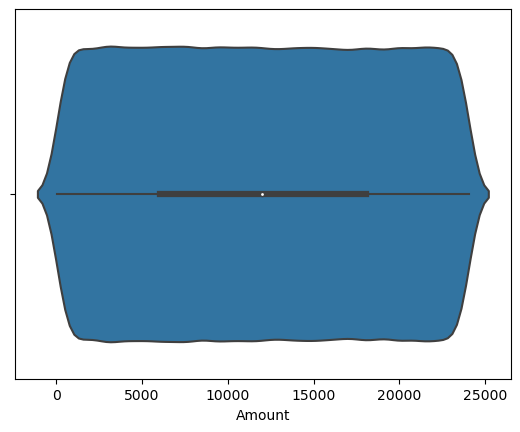

In [18]:
# Box plots for the transaction amount
sns.violinplot(x=X_train_df['Amount'])
plt.show()

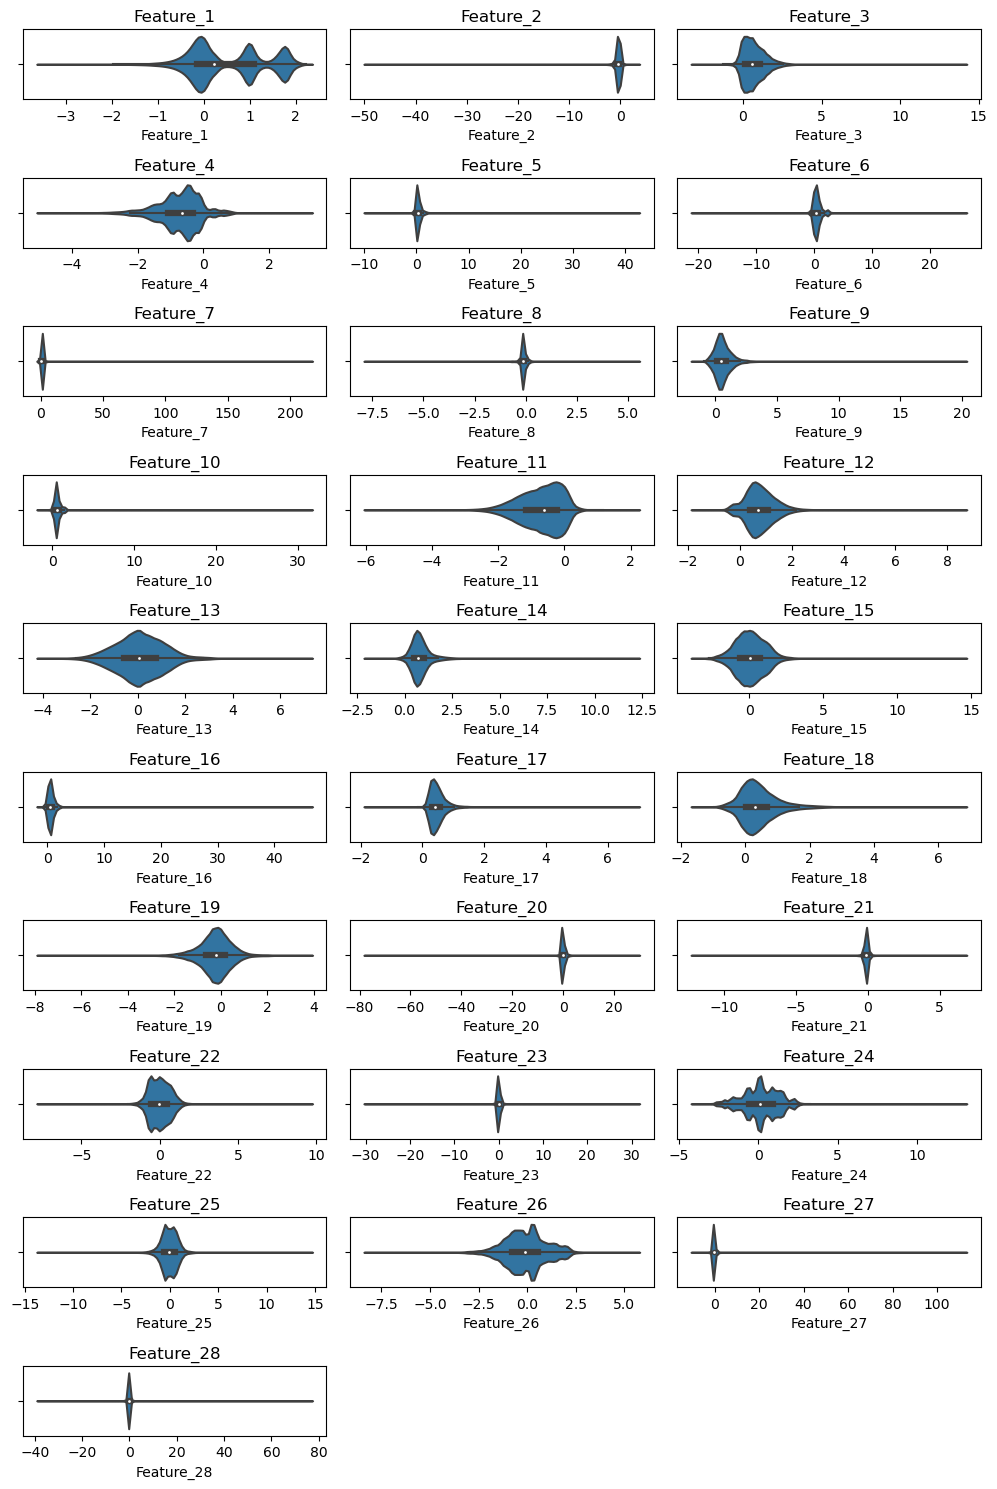

In [19]:
n_features = len(X_train_df.drop('Amount', axis=1).columns)
n_rows = 10
n_cols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15))  # Adjust the size as needed

# Flatten the axes array for easy iterating
axes = axes.flatten()

for i, col in enumerate(X_train_df.drop('Amount', axis=1).columns):
    sns.violinplot(x=X_train_df[col], ax=axes[i])  # Changed to violinplot
    axes[i].set_title(col)  # Set title for each subplot

# If the number of features is not a multiple of the grid size, hide the empty plots
for i in range(n_features, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

# Bivariate Analysis

We can see that when plotting two columns, there are outliers visible. But this does not have to mean anything in the higher dimensional spaces (when more features are included)

### Correlation matrix 

--> hard to perform in this state because of so many features

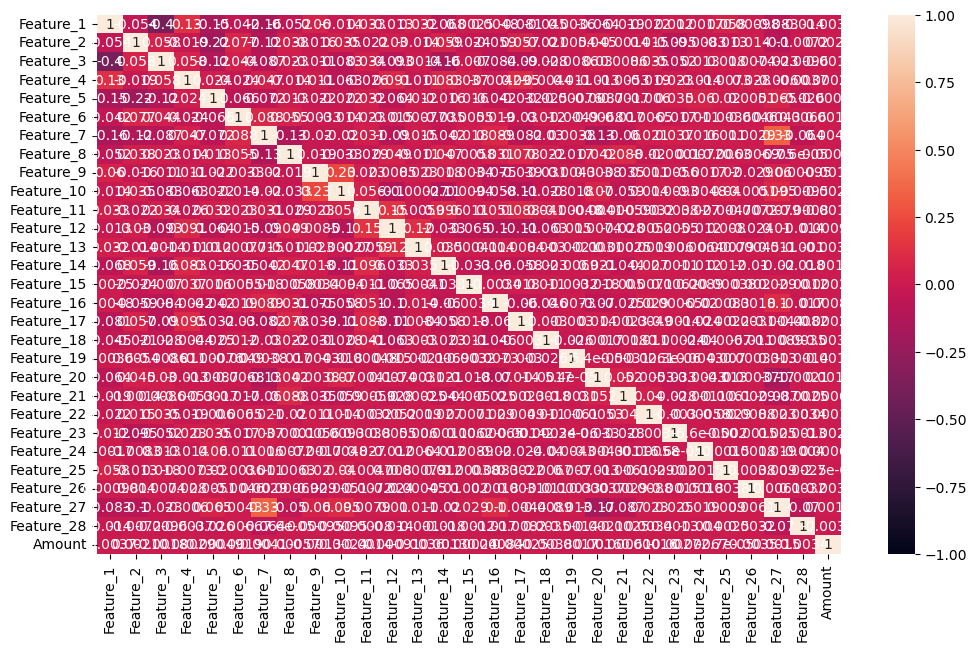

In [20]:
plt.figure(figsize=(12, 7))
sns.heatmap(X_train_df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

### Pair plots for the first 8 features

In [21]:
# Pair plots do not work vor Seaborn version below v0.12.2 !
print(sns.__version__)

0.12.2


In [22]:
data_sub = X_train_df.iloc[:, :8]
data_sub

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
0,-0.808528,0.674859,-0.449053,-1.009887,-0.313425,-0.329320,-0.032745,0.596103
1,0.074483,-0.412612,1.567228,-1.086749,-0.002263,-0.020128,0.395198,-0.184193
2,0.756835,-0.449989,0.898726,0.290844,0.369626,1.465313,0.286892,0.003828
3,1.171350,-1.101996,-0.226173,-1.968957,0.360373,0.620495,0.532979,-0.149801
4,-0.076201,0.056564,0.014876,-0.250377,0.840080,0.452710,0.905192,-0.071975
...,...,...,...,...,...,...,...,...
255878,-0.299734,-0.040073,1.205246,-0.616993,0.167718,0.369611,0.597995,-0.076517
255879,-0.276721,-0.166578,1.147702,-1.935400,0.285289,-0.292188,0.698153,-0.060359
255880,-0.535104,-0.082417,0.082148,-0.828826,0.095325,0.283307,0.253029,-0.531629
255881,-0.381533,-0.025821,1.137723,-0.150185,0.041439,0.516437,0.415685,0.090887


In [ ]:
# Creating the pairplot
plt.figure(figsize=(13, 17))
sns.pairplot(data=data_sub)
plt.show()

### Pair plots for the last 8 features

In [ ]:
data_sub = X_train_df.iloc[:, -8:]
data_sub

In [ ]:
# Creating the pairplot
plt.figure(figsize=(13, 17))
sns.pairplot(data=data_sub) 
plt.show()

# Feature selection

### ideas:
0. given two features that are highly **correlated** with each other, drop one of them
1. drop features that have **low variance**: Features with very low variance might not be useful for anomaly detection as they do not vary much across different observations.
2. use **feature importance from machine learning models** (not possible because we have no labels)
    - e.g. random forest or Gradient boosting to assess feature importance
    - e.g. Linear regression: look at the coefficients
3. **Univariate feature selection**: SelectKBest or SelectPercentile (not possible because both algorithms need labels)
4. **Dimensionality Reduction**: PCA
5. via **Domain knowledge**: not possible at all because features are anonymized
6. via **Visualization**: hard because many features and therefore many plots ...
7. **Autoencoders**: Train an autoencoder on the dataset and analyze the reconstruction error. Features that contribute significantly to a higher reconstruction error when perturbed might be more relevant for detecting anomalies.

---> The only reasonable methods here are 0., 1., 4., 7., 8.

### Drop low variance features

From this analysis, we could exclude the features 17, 21, 8 because they have very low variance compared to all the other measures. We could say that we only keep features above a variance threshold of 0.2 and we would still only drop the features 17, 21, 8.

In [ ]:
variances = X_train_df.iloc[:, :-1].var() # exclude amount column
variances

In [ ]:
# Sort variances in descending order
sorted_variances = variances.sort_values(ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))
sorted_variances.plot(kind='bar')
plt.title('Feature Variances (High to Low)')
plt.ylabel('Variance')
plt.xlabel('Features')
plt.show()

### Dimensionality Reduction via PCA

**Remark**: PCA does only tell how much it keeps up the total variance for a given dimension reduction. It cannot tell which features are less relevant than others. 

**Problem**: Which number n of reduced dimensions should be chosen?

**Different approaches for that**: explained variance ratio, scree plot, minimum number for desired performance

In the following analysis, we use explained variance ratio

We can see that 
- with 25 features, we still have about 100% total variance
- with 23 features, we still have about 95% total variance
- with 20 features, we still have about 90% total variance
- with 7 features, we have about 50% total variance

Thus doing PCA to reduce to 20 dimensions should still be reasonable. However, this should be validated through results.

In [ ]:
X_train_df_modified = X_train_df.iloc[:, :-1] # drop the amount column

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_df_modified)  
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA().fit(X_train_df_modified)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_) * 100  # In percentage

plt.figure(figsize=(10, 6))

# Plotting the cumulative explained variance ratio
plt.plot(cumulative_variance_ratio, label='Cumulative Explained Variance')

# Adding red dashed line at 95% and 90% variance
plt.axhline(y=95, color='r', linestyle='--', label='95% Explained Variance')
plt.axhline(y=90, color='r', linestyle='-.', label='90% Explained Variance')

# Marking the number of components at 95% and 90% variance
num_components_95 = np.where(cumulative_variance_ratio >= 95)[0][0] + 1  # Adding 1 due to zero-indexing
num_components_90 = np.where(cumulative_variance_ratio >= 90)[0][0] + 1  # Adding 1 due to zero-indexing

plt.axvline(x=num_components_95, color='grey', linestyle='--', alpha=0.7)
plt.axvline(x=num_components_90, color='grey', linestyle='-.', alpha=0.7)

# Annotating the number of components
plt.text(num_components_95, cumulative_variance_ratio[num_components_95], f'  {num_components_95} Components', verticalalignment='bottom')
plt.text(num_components_90, cumulative_variance_ratio[num_components_90], f'  {num_components_90} Components', verticalalignment='top')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance by PCA Components')
plt.legend()
plt.grid(True)
plt.show()

### Autoencoder

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [ ]:
X_train_df_modified = X_train_df.iloc[:, :-1] # drop the amount column

In [ ]:
len(X_train_df_modified.columns)

In [ ]:
# Normalizing the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train_df_modified)

# Converting to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Creating a dataset and data loader
dataset = TensorDataset(X_tensor, X_tensor) # autoencoder: input and output are the same for reconstruction loss
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

In [ ]:
# Defining the autoencoder: just encoder layer (input), bottleneck layer (latent space), decoder layer (output)
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_dim, encoding_dim)
        self.decoder = nn.Linear(encoding_dim, input_dim)

    def forward(self, x):
        x = torch.relu(self.encoder(x))
        x = torch.sigmoid(self.decoder(x))
        return x

In [ ]:
# Initialize the autoencoder
input_dim = X_train_df_modified.shape[1]  # 28 columns
encoding_dim = 14  # Example: reducing to half of the original dimensions
autoencoder = Autoencoder(input_dim, encoding_dim)

# Loss function and optimizer
criterion = nn.MSELoss() # reconstruction loss based on MSE loss
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)

In [ ]:
# Training the autoencoder
epochs = 10
for epoch in range(epochs):
    for data in dataloader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

In [ ]:
# Extracting the encoder
encoder = autoencoder.encoder

# Using the encoder to reduce dimensionality
with torch.no_grad():
    X_reduced = encoder(X_tensor)

# Converting reduced data back to DataFrame
X_reduced_df = pd.DataFrame(X_reduced.numpy())

X_reduced_df.head()  # Displaying the first few rows of the reduced dataset

In [ ]:
len(X_train_df_modified)

In [ ]:
len(X_reduced_df)

#### Quick test how the performance changes now when applying OCSVM

1. first with all features

2. then with encoded features (from autoencoder)

In [ ]:
import time
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score

In [ ]:
len(X_train_df.columns)

In [ ]:
X_test_corrected = X_test[:, 1:-1] #remove id and amount column

In [ ]:
# Timing and Training the One-Class SVM model
start_time = time.time()
oc_svm = OneClassSVM().fit(X_train_df_modified[:10000]) # just with 10000 training data points, otherwise takes too long
oc_svm_duration = time.time() - start_time
print(f"One-Class SVM training time: {oc_svm_duration:.2f} seconds")

In [ ]:
# Predict on the test set
y_pred_test = oc_svm.predict(X_test_corrected)
# Convert predictions to match y_test labels (0 for anomalies, 1 for normal)
y_pred_test = (y_pred_test == 1).astype(int)
# evaluation: f1 score
f1_score_1 = f1_score(y_test, y_pred_test, average='micro')

In [ ]:
print("F1_score: ", f1_score_1)

In [ ]:
len(X_reduced_df.columns)

In [ ]:
# Timing and Training the One-Class SVM model
start_time = time.time()
oc_svm = OneClassSVM().fit(X_reduced_df[:10000]) # just with 10000 training data points, otherwise takes too long
oc_svm_duration = time.time() - start_time
print(f"One-Class SVM training time: {oc_svm_duration:.2f} seconds")

In [ ]:
# ENCODE
X_test_scaled = scaler.fit_transform(X_test_corrected)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
with torch.no_grad():
    X_test_reduced = encoder(X_test_tensor)
X_test_reduced_df = pd.DataFrame(X_test_reduced.numpy())

In [ ]:
# Predict on the test set
y_pred_test = oc_svm.predict(X_test_reduced_df)
# Convert predictions to match y_test labels (0 for anomalies, 1 for normal)
y_pred_test = (y_pred_test == 1).astype(int)
# evaluation: f1 score
f1_score_2 = f1_score(y_test, y_pred_test, average='micro')

In [ ]:
print("F1_score: ", f1_score_2)